# (Week2) 🃏 ダミーデータの作成

<hr>

## 【問題1】乱数の作成
平均が(-3, 0)、[共分散行列(covariance matrix)](https://ja.wikipedia.org/wiki/%E5%88%86%E6%95%A3%E5%85%B1%E5%88%86%E6%95%A3%E8%A1%8C%E5%88%97)が以下で表される
[2次元正規分布(multivariate normal distribution)](http://www.f-denshi.com/000TokiwaJPN/17kakto/apdx02.html)による乱数を500個作成してください。
```
[1.0, 0.8]
[0.8, 1.0]
```
Cf. [numpy.random.multivariate_normal — NumPy v1.19 Manual](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html)

In [1]:
import numpy as np

In [2]:
np.random.seed(0) #実行毎に値が変更されないように固定

mean = [-3, 0]
cov = [[1, 0.8], [0.8, 1]] # diagonal covariance
sample = 500

x, y = np.random.multivariate_normal(mean, cov, sample).T
print('# [x]行列:{0} 型:{1}'.format(x.shape, type(x)))
# print(x)
print('-'*40)
print('# [y]行列:{0} 型:{1}'.format(y.shape, type(y)))
# print(y) 

# [x]行列:(500,) 型:<class 'numpy.ndarray'>
----------------------------------------
# [y]行列:(500,) 型:<class 'numpy.ndarray'>


```Python
# Cf.公式
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
```

<hr>

## 【問題2】散布図による可視化
Cf. [matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

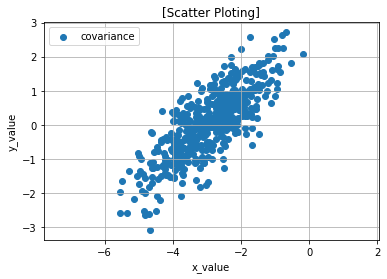

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x, y, label='covariance')
plt.title('[Scatter Ploting]')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.axis('equal')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

```memo```

スライシングでデータを分けてもOK
```Python
plt.scatter(data[:, 0], data[:, 1])
```

<hr>

## 【問題3】ヒストグラムによる可視化
```Cf. ```

+ [matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
+ [matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html)

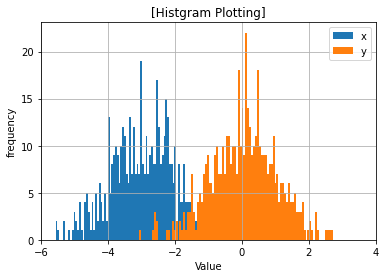

In [4]:
plt.hist(x, label='x', bins=100)
plt.hist(y, label='y', bins=100)
plt.title('[Histgram Plotting]')
plt.xlabel('Value')
plt.ylabel('frequency') #周波数
plt.xlim(-6.0 ,4.0)
plt.legend()
plt.grid(True)
plt.show()

平均値が「−３」「０」なので、山が一番高いところがその辺りになることを確認！

<hr>

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成
```
[1.0, 0.8]
[0.8, 1.0]
```

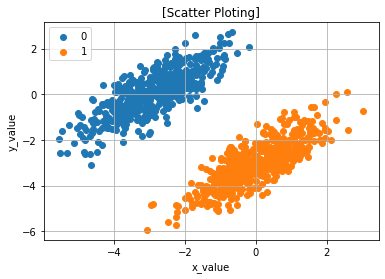

In [5]:
mean = [0, -3]
n, m = np.random.multivariate_normal(mean, cov, (500)).T

plt.scatter(x, y, label='0')
plt.scatter(n, m, label='1')
plt.title('[Scatter Ploting]')
plt.xlabel('x_value')
plt.ylabel('y_value')
# plt.axis('equal')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<hr>

## 【問題5】データの結合

```Cf.```
+ [numpy.concatenate — NumPy v1.19 Manual](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)
+ [numpy.vstack — NumPy v1.19 Manual](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)
+ [NumPy配列ndarrayを結合（concatenate, stack, blockなど） - note.nkmk.me](https://note.nkmk.me/python-numpy-concatenate-stack-block/)

In [1]:
print('# [x]行列：{0}　型：{1}'.format(x.shape, type(x)))
print('# [y]行列：{0}　型：{1}'.format(y.shape, type(y)))
print('# [n]行列：{0}　型：{1}'.format(n.shape, type(n)))
print('# [m]行列：{0}　型：{1}'.format(m.shape, type(m)))
print('-'*40)

# 値通しを縦に結合（h:horizon(横), v:vertical(縦)）
a = np.hstack((x, y))
b = np.hstack((n, m)) 
print('# [a]行列：{0}　型：{1}'.format(a.shape, type(a)))
print('# [b]行列：{0}　型：{1}'.format(b.shape, type(b)))

z = np.vstack((a, b)).T
print('# [z]行列：{0}　型：{1}'.format(z.shape, type(z)))

NameError: name 'x' is not defined

## 【問題6】ラベル付け
```Cf.```
+ [NumPy配列ndarrayに要素・行・列を挿入、追加するinsertの使い方 - note.nkmk.me](https://note.nkmk.me/python-numpy-insert/)
+ [NumPy配列ndarrayに次元を追加するnp.newaxis, np.expand_dims() - note.nkmk.me](https://note.nkmk.me/python-numpy-newaxis/)

In [22]:
c = np.arange(12).reshape((6, 2))
np.insert(c, 2, 100, axis=1)

array([[  0,   1, 100],
       [  2,   3, 100],
       [  4,   5, 100],
       [  6,   7, 100],
       [  8,   9, 100],
       [ 10,  11, 100]])

In [58]:
zero = np.zeros(a.shape[0])
one = np.ones(b.shape[0])
print('# [zero]行列：{0} 型:{1}'.format(zero.shape, type(zero)))
print('# [one]行列：{0} 型:{1}'.format(one.shape, type(one)))

new_a = np.vstack((a, zero))
new_b = np.vstack((b, one))
print('# [new_a]行列：{0} 型:{1}'.format(new_a.shape, type(new_a)))
print('# [new_b]行列：{0} 型:{1}'.format(new_b.shape, type(new_b)))

new_z = np.hstack((new_a, new_b))
new_z.T

# [zero]行列：(1000,) 型:<class 'numpy.ndarray'>
# [one]行列：(1000,) 型:<class 'numpy.ndarray'>
# [new_a]行列：(2, 1000) 型:<class 'numpy.ndarray'>
# [new_b]行列：(2, 1000) 型:<class 'numpy.ndarray'>


array([[-4.80006782,  0.        ],
       [-4.63714503,  0.        ],
       [-4.46267867,  0.        ],
       ...,
       [-3.15676476,  1.        ],
       [-4.27950068,  1.        ],
       [-2.33126243,  1.        ]])